In [ ]:
from fastai.tabular.all import *

In [ ]:
datafile = Path('./data.csv')

## build data.csv with shell

In [ ]:
!(echo x,y; for A in `seq 0 25000`; do echo $A,$A; done) > data.csv
!head data.csv

x,y
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8


## build data.csv with Python

In [ ]:
datafile.unlink()

In [ ]:
if not datafile.exists():
    print(f"making {datafile}")
    data = ((x,x) for x in range(0, 25000+1))
    df = pd.DataFrame(data, columns = ['x', 'y'])
    df.to_csv(datafile, index=False)

making data.csv


In [ ]:
!head data.csv

x,y
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8


## check the docs

In [ ]:
tabular_learner?

Signature:
tabular_learner(
    dls: 'TabularDataLoaders',
    layers: 'list' = None,
    emb_szs: 'list' = None,
    config: 'dict' = None,
    n_out: 'int' = None,
    y_range: 'Tuple[float, float]' = None,
    *,
    loss_func: 'callable | None' = None,
    opt_func=<function Adam at 0x7fb5892bd990>,
    lr=0.001,
    splitter: 'callable' = <function trainable_params at 0x7fb58b449a20>,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
    default_cbs: 'bool' = True,
)
Docstring: Get a `Learner` using `dls`, with `metrics`, including a `TabularModel` created using the remaining params.
File:      /usr/local/lib/python3.10/dist-packages/fastai/tabular/learner.py
Type:      function


In [ ]:
doc(tabular_learner)  # note the link to the online docs

## show the full docs with nbdev

In [ ]:
from nbdev.showdoc import show_doc
show_doc(tabular_learner)

---

[source](https://github.com/fastai/fastai/blob/master/fastai/tabular/learner.py#LNone){target="_blank" style="float:right; font-size:smaller"}

### tabular_learner

>      tabular_learner (dls:TabularDataLoaders, layers:list=None,
>                       emb_szs:list=None, config:dict=None, n_out:int=None,
>                       y_range:Tuple[float,float]=None,
>                       loss_func:callable|None=None, opt_func=<function Adam>,
>                       lr=0.001, splitter:callable=<function trainable_params>,
>                       cbs=None, metrics=None, path=None, model_dir='models',
>                       wd=None, wd_bn_bias=False, train_bn=True, moms=(0.95,
>                       0.85, 0.95), default_cbs:bool=True)

Get a `Learner` using `dls`, with `metrics`, including a `TabularModel` created using the remaining params.

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| dls |  |  | `DataLoaders` containing data for each dataset needed for `model` |
| layers | list | None | Size of the layers generated by `LinBnDrop` |
| emb_szs | list | None | Tuples of `n_unique, embedding_size` for all categorical features |
| config | dict | None | Config params for TabularModel from `tabular_config` |
| n_out | int | None | Final output size of the model |
| y_range | Tuple[float, float] | None | Low and high for the final sigmoid function |
| loss_func | callable \| None | None | Loss function for training |
| opt_func | function | Adam | Optimisation function for training |
| lr | float | 0.001 | Learning rate |
| splitter | callable | trainable_params | Used to split parameters into layer groups |
| cbs | NoneType | None | Callbacks |
| metrics | NoneType | None | Printed after each epoch |
| path | NoneType | None | Parent directory to save, load, and export models |
| model_dir | str | models | Subdirectory to save and load models |
| wd | NoneType | None | Weight decay |
| wd_bn_bias | bool | False | Apply weight decay to batchnorm bias params? |
| train_bn | bool | True | Always train batchnorm layers? |
| moms | tuple | (0.95, 0.85, 0.95) | Momentum |
| default_cbs | bool | True | Include default callbacks? |

## setup

In [ ]:
df = pd.read_csv('./data.csv') # csv containing x,y with rows 0,0 through 25000,25000

In [ ]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))
to = TabularPandas(df, procs=[Categorify, FillMissing, Normalize],
                   cont_names = ['x'],
                   y_names='y',
                   splits=splits)
dls = to.dataloaders()
learn = tabular_learner(dls, lr=0.3, metrics=rmse)

## learning rate finder

SuggestedLRs(valley=0.3630780577659607)

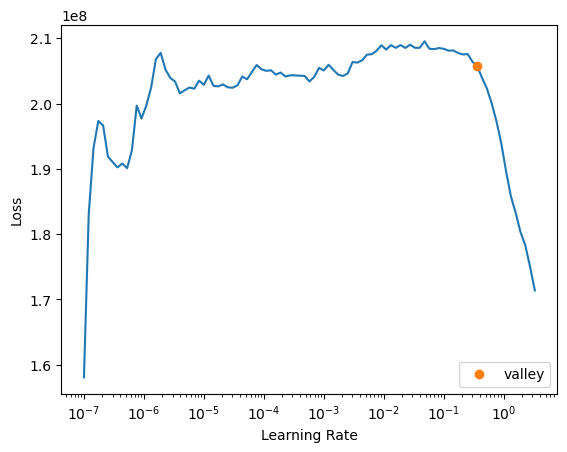

In [ ]:
learn.lr_find()

## learning

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,time
0,4361998.000000,25638736.000000,00:00
1,1209958.125000,8368821.000000,00:00
2,1153518.125000,718328.062500,00:00
3,1072896.625000,72083.593750,00:00


## see if it works

In [ ]:
for i in [0, 100, 3000, 10000, 19000, 25000]:
    row, clas, probs = learn.predict(df.iloc[i])
    row.show()

,x,y
0,0.000049,8.357551


,x,y
0,99.999659,106.460709


,x,y
0,3000.000378,2951.463623


,x,y
0,9999.99993,9818.710938


,x,y
0,18999.999845,18648.03125


,x,y
0,24999.999645,24534.242188


In [ ]:
plt.figure(figsize = (15,10))
for i in range(1,25000,250):
    row, _, _ = learn.predict(df.iloc[i].drop('y'))
    plt.scatter(i, row['y'] - i, s = 50, c='orange')